In [1]:
# imports and setup
import numpy as np
import pandas
from numpy.random import default_rng

from sklearn.datasets import make_classification, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.set_printoptions(suppress=True, precision=3)
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter('ignore', category=ConvergenceWarning)

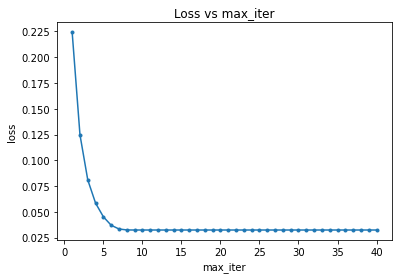

In [2]:
'''
1. TO DO: Fit logistic regression models to training data using liblinear solver. 
    Explore what happens when we build a logistic regression model with max_iter set to i
Fit each model to training data and keep track of accuracy of resulting model 
   (via model's own score())
Also keep track of the log loss of that model on the training data
Produce two plots, each with values of i as x-axis and accuracy/loss as y-axis. Discuss results
'''
#x_train = pandas.read_csv('x_train.csv')
#y_train = pandas.read_csv('y_train.csv')
#x_test = pandas.read_csv('x_test.csv')
#y_test = pandas.read_csv('y_test.csv')

#x_tr = x_train.iloc[:,:].values
#y_tr = y_train.iloc[:,:].values
#x_te = x_test.iloc[:,:].values
#y_te = y_test.iloc[:,:].values

x_tr = np.loadtxt('x_train.csv', delimiter=',', skiprows=1)
y_tr = np.loadtxt('y_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('x_test.csv', delimiter=',', skiprows=1)
y_te = np.loadtxt('y_test.csv', delimiter=',', skiprows=1)

#print(y_tr.shape)
#print(x_tr)
#print(y_tr)

loss_list = list()
score_list = list()
coef_list = list()
i=0

for i in range(1,41):
    model = LogisticRegression(solver='liblinear', max_iter=i)
    model.fit(x_tr, y_tr)
    y_prob = model.predict_proba(x_tr)[:,1]
    score = model.score(x_tr, y_tr) #is this supposed to be tr or te?
    score_list.append(score)
    loss = log_loss(y_tr, y_prob)
    loss_list.append(loss)
    coef = model.coef_
    coef_list.append(coef[0,0])
    
'''
model = LogisticRegression(solver='liblinear', max_iter=10)
model.fit(x_tr, y_tr)
y_prob = model.predict_proba(x_tr)
model.score(x_tr, y_tr) #is this supposed to be tr or te?
loss = log_loss(y_tr, y_prob)
loss_list.append(loss)
'''
#print(f"score_list: {score_list}")
#print(f"loss_list: {loss_list}")
#print(coef) two brakcet = 2D

plt.xlabel('max_iter');
plt.ylabel('loss');
plt.plot(range(1,41), loss_list, marker='.', label='Loss')
plt.title('Loss vs max_iter');

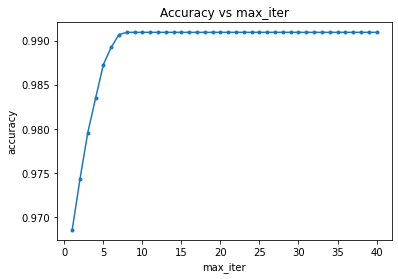

In [3]:
plt.xlabel('max_iter');
plt.ylabel('accuracy');
plt.plot(range(1,41), score_list, marker='.', label='Score')
plt.title('Accuracy vs max_iter');

In [4]:
#TO DO: Discuss the results you are seeing, what do they show, and why

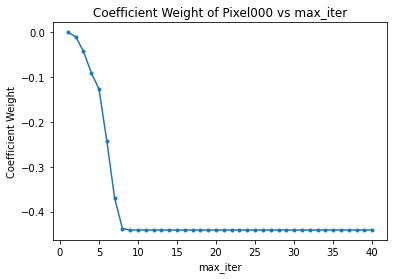

In [5]:
#2. Use coef_ attribute to access weights assigned to each feature
#For each i model generated, record first weight to pixel1000 in input data.
#Plot i vs feature weight. Discuss
#model.coef_ #this is for i=40, first pixel is pixel000

plt.xlabel('max_iter');
plt.ylabel('Coefficient Weight');
plt.plot(range(1,41), coef_list, marker='.', label='Pixel000 Coefficient')
plt.title('Coefficient Weight of Pixel000 vs max_iter');

In [6]:
#TO DO: Discuss the results you are seeing; what do they show, and why

In [7]:
#3. For each value of c, create a model and fit it to training data like last hw
#Compute log loss of that model on test data. Determine which value gives least loss on test data. 
#Record accuracy sore
#Include a table for confusion matrix of model

loss_list = list()
score_list2 = list()
predict_list = list()
best_c_index = 0
best_c = 0
best_acc = 0

# TODO fit, predict_proba, and evaluate logistic loss    
# Record the best model here
C_grid = np.logspace(-9, 6, 31)

for C in range(len(C_grid)):
    #build and evaluate model for each value C
    model = LogisticRegression(solver='liblinear',C=C_grid[C])
    #TRAINING: fit and predict
    model.fit(x_tr, y_tr)
    y_prob = model.predict_proba(x_te)[:,1]
    #add y_predict (double check this)
    y_predict = model.predict(x_te)
    predict_list.append(y_predict)
    loss = log_loss(y_te, y_prob)
    loss_list.append(loss)
    score2 = model.score(x_te, y_te)
    score_list2.append(score)
    
    if C==0:
        #print(C)
        best_c_index = C
        #print(f"best_c at 0: {best_c} with {loss_list[best_c]}")
    elif C>0:
        if loss_list[best_c_index] < loss_list[C]:
            best_c_index = best_c_index
            #print(f"best_c if old is better: {best_c} with {loss_list[best_c]}")
        else:
            best_c_index = C
            #print(f"best_c if new is better: {best_c} with {loss_list[best_c]}")

best_c = C_grid[best_c_index]
best_acc = score_list2[best_c_index]
print(f"best_c: {best_c}")
print(f"best_acc: {best_acc}") #with best c value

best_c: 0.03162277660168379
best_acc: 0.9909322033898305


In [8]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    i=int(0)
    j=int(0)
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats. Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats. Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset. Needs to be same size as ytrue_N.
    '''

    for i in range(len(ytrue_N)):
        #print(f"i: {i}")
        #print(f"type(i): {type(i)}")
        for j in range(len(yhat_N)):
            #print(f"j: {j}")
            if i==j:
                if ytrue_N[i] == False:
                    if int(ytrue_N[i]) == int(yhat_N[j]):
                        TN +=1
                        i +=1
                        j +=1
                    else:
                        FP +=1
                        i +=1
                        j +=1
                else: #if ytrue == 1
                    if ytrue_N[i]==yhat_N[j]: #check if TP
                        TP +=1
                        i +=1
                        j +=1
                    else:
                        FN +=1
                        i +=1
                        j +=1
            else:
                i +=1
                j +=1
        
    '''
    Returns
    -------
    TP : float Number of true positives
    TN : float Number of true negatives
    FP : float Number of false positives
    FN : float Number of false negatives
    '''

    return TP, TN, FP, FN

In [9]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pandas.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [10]:
TP, TN, FP, FN = calc_TP_TN_FP_FN(y_te, y_prob)

#TODO: Make confusion matrix
cm_df = calc_confusion_matrix_for_threshold(y_te, y_prob, thresh=0.5)
print(cm_df)

Predicted    0    1
True               
0          923   51
1           53  956


8


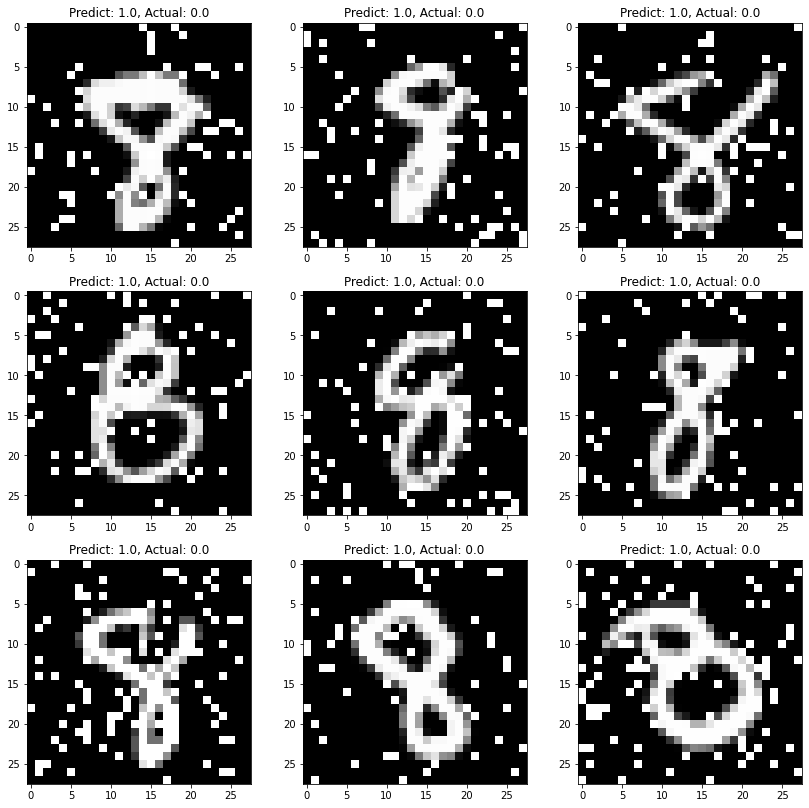

In [11]:
#4. Produce two plots, one of False Positive's in test set...

#From LogisticRegression Demo
wrong = np.nonzero((y_predict == 1) & (y_predict != y_te))[0] #change to y_predict
#print(wrong)

plt.figure(figsize=(14, 14))
for plotIdx, wrongIdx in enumerate(wrong[0:9]):
    plt.subplot(3, 3, (plotIdx + 1))
    #plt.subplot(3, 3, 14)
    plt.imshow(np.reshape(x_te[wrongIdx], (28,28)), cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.title('Predict: {:.1f}, Actual: {:.1f}'.format(y_predict[wrongIdx], y_te[wrongIdx]))

print(plotIdx)

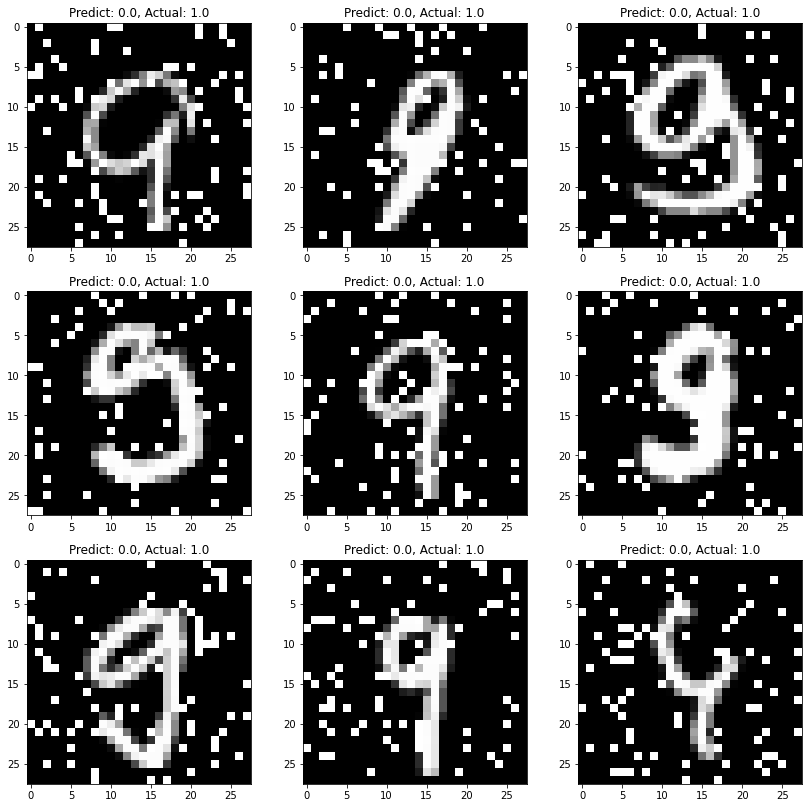

In [12]:
#4. Produce plot of FN's.
wrong = np.nonzero((y_predict == 0) & (y_predict != y_te))[0]

plt.figure(figsize=(14, 14))
for plotIdx, wrongIdx in enumerate(wrong[0:9]):
    plt.subplot(3, 3, plotIdx + 1)
    plt.imshow(np.reshape(x_te[wrongIdx], (28,28)), cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.title('Predict: {:.1f}, Actual: {:.1f}'.format(y_predict[wrongIdx], y_te[wrongIdx]))

In [13]:
#TODO: Discuss the results you are seeing. What mistakes is the classifier making?

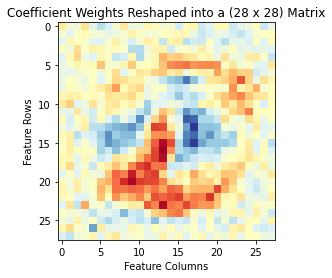

In [14]:
#5. Reshape weight coefficients into matrix and plot images with colormap
model = LogisticRegression(solver='liblinear',C=C_grid[best_c_index])
#TRAINING: fit and predict
model.fit(x_tr, y_tr)
coef_5 = model.coef_
plt.imshow(np.reshape(coef_5, (28,28)), cmap="RdYlBu", vmin=-0.5, vmax=0.5);

plt.xlabel('Feature Columns');
plt.ylabel('Feature Rows');
plt.title('Coefficient Weights Reshaped into a (28 x 28) Matrix');

In [15]:
#TODO: Discuss what it shows. Which pixels correspond to an 8 (have negative weights), 
#and which correspond to a 9 (have positive weights)? 
#Why do you think this is the case?
